In [1]:
import sys
import numpy as np
import pandas as pd
import MySQLdb
import matplotlib.pyplot as plt
sys.path.insert(0, '/home/kenleejr92/kenlee_home/energy_market_project/scripts/MySQL_scripts/')
from Query_ERCOT_DB import Query_ERCOT_DB
import cPickle as pickle
from datetime import datetime


class LMP_Query(Query_ERCOT_DB):

    def __init__(self):
        self.node_dict = {}
        self.table_list = []
        self.df = None
        self.table_boundaries = {'table0':('0001', 'BLUEMD1_8X'),
                                 'table1':('BLUEMD1_8Z', 'CHT_M'),
                                 'table2':('CHT_X', 'DUKE_8405'),
                                 'table3':('DUKE_8505', 'ELEVEE_E8'),
                                 'table4':('ELEVEE_W8', 'GREENLK_L_A'),
                                 'table5':('GREENLK_L_B', 'KEETER'),
                                 'table6':('KEITH', 'L_CEDAHI8_1Y'),
                                 'table7':('L_CEDAHI8_1Z', 'MOSES_1G'),
                                 'table8':('MOSES_2G', 'PHR_8135'),
                                 'table9':('PHR_8140', 'SANDOW1_8Y'),
                                 'table10':('SANDOW_4G', 'TCN7225_BUS'),
                                 'table11': ('TCN7230_BUS', 'VENSW_1777'),
                                 'table12':('VENSW_1785', '_WC_V_C')
                                 }
        for i in range(0,13):
            Query_ERCOT_DB.c.execute("""SHOW columns FROM DAM_LMP%s""" % i)
            result = [r[0] for r in Query_ERCOT_DB.c.fetchall()[2:]]
            self.table_list.append(result)
            for node in result:
                self.node_dict[node] = i


    def query(self, nodes, start_date, end_date):
        node_string=''
        for node in nodes:
            node_string = node_string + node + ',' + ' '
        node_string = node_string[:-2]
        s = """SELECT DAM_LMP0.delivery_date, DAM_LMP0.hour_ending, %s 
                                    from DAM_LMP0 join DAM_LMP1 on (DAM_LMP0.delivery_date = DAM_LMP1.delivery_date and DAM_LMP0.hour_ending = DAM_LMP1.hour_ending) 
                                    join DAM_LMP2 on (DAM_LMP0.delivery_date = DAM_LMP2.delivery_date and DAM_LMP0.hour_ending = DAM_LMP2.hour_ending)
                                    join DAM_LMP3 on (DAM_LMP0.delivery_date = DAM_LMP3.delivery_date and DAM_LMP0.hour_ending = DAM_LMP3.hour_ending)
                                    join DAM_LMP4 on (DAM_LMP0.delivery_date = DAM_LMP4.delivery_date and DAM_LMP0.hour_ending = DAM_LMP4.hour_ending)
                                    join DAM_LMP5 on (DAM_LMP0.delivery_date = DAM_LMP5.delivery_date and DAM_LMP0.hour_ending = DAM_LMP5.hour_ending)
                                    join DAM_LMP6 on (DAM_LMP0.delivery_date = DAM_LMP6.delivery_date and DAM_LMP0.hour_ending = DAM_LMP6.hour_ending)
                                    join DAM_LMP7 on (DAM_LMP0.delivery_date = DAM_LMP7.delivery_date and DAM_LMP0.hour_ending = DAM_LMP7.hour_ending)
                                    join DAM_LMP8 on (DAM_LMP0.delivery_date = DAM_LMP8.delivery_date and DAM_LMP0.hour_ending = DAM_LMP8.hour_ending)
                                    join DAM_LMP9 on (DAM_LMP0.delivery_date = DAM_LMP9.delivery_date and DAM_LMP0.hour_ending = DAM_LMP9.hour_ending)
                                    join DAM_LMP10 on (DAM_LMP0.delivery_date = DAM_LMP10.delivery_date and DAM_LMP0.hour_ending = DAM_LMP10.hour_ending)
                                    join DAM_LMP11 on (DAM_LMP0.delivery_date = DAM_LMP11.delivery_date and DAM_LMP0.hour_ending = DAM_LMP11.hour_ending)
                                    join DAM_LMP12 on (DAM_LMP0.delivery_date = DAM_LMP12.delivery_date and DAM_LMP0.hour_ending = DAM_LMP12.hour_ending)
                                    where DAM_LMP0.delivery_date > "%s" and DAM_LMP0.delivery_date < "%s";""" % (node_string, start_date, end_date)
        Query_ERCOT_DB.c.execute("""SELECT DAM_LMP0.delivery_date, DAM_LMP0.hour_ending, %s 
                                    from DAM_LMP0 join DAM_LMP1 on (DAM_LMP0.delivery_date = DAM_LMP1.delivery_date and DAM_LMP0.hour_ending = DAM_LMP1.hour_ending) 
                                    join DAM_LMP2 on (DAM_LMP0.delivery_date = DAM_LMP2.delivery_date and DAM_LMP0.hour_ending = DAM_LMP2.hour_ending)
                                    join DAM_LMP3 on (DAM_LMP0.delivery_date = DAM_LMP3.delivery_date and DAM_LMP0.hour_ending = DAM_LMP3.hour_ending)
                                    join DAM_LMP4 on (DAM_LMP0.delivery_date = DAM_LMP4.delivery_date and DAM_LMP0.hour_ending = DAM_LMP4.hour_ending)
                                    join DAM_LMP5 on (DAM_LMP0.delivery_date = DAM_LMP5.delivery_date and DAM_LMP0.hour_ending = DAM_LMP5.hour_ending)
                                    join DAM_LMP6 on (DAM_LMP0.delivery_date = DAM_LMP6.delivery_date and DAM_LMP0.hour_ending = DAM_LMP6.hour_ending)
                                    join DAM_LMP7 on (DAM_LMP0.delivery_date = DAM_LMP7.delivery_date and DAM_LMP0.hour_ending = DAM_LMP7.hour_ending)
                                    join DAM_LMP8 on (DAM_LMP0.delivery_date = DAM_LMP8.delivery_date and DAM_LMP0.hour_ending = DAM_LMP8.hour_ending)
                                    join DAM_LMP9 on (DAM_LMP0.delivery_date = DAM_LMP9.delivery_date and DAM_LMP0.hour_ending = DAM_LMP9.hour_ending)
                                    join DAM_LMP10 on (DAM_LMP0.delivery_date = DAM_LMP10.delivery_date and DAM_LMP0.hour_ending = DAM_LMP10.hour_ending)
                                    join DAM_LMP11 on (DAM_LMP0.delivery_date = DAM_LMP11.delivery_date and DAM_LMP0.hour_ending = DAM_LMP11.hour_ending)
                                    join DAM_LMP12 on (DAM_LMP0.delivery_date = DAM_LMP12.delivery_date and DAM_LMP0.hour_ending = DAM_LMP12.hour_ending)
                                    where DAM_LMP0.delivery_date > "%s" and DAM_LMP0.delivery_date < "%s"
                                    order by DAM_LMP0.delivery_date, DAM_LMP0.hour_ending;""" % (node_string, start_date, end_date))
        result = list(Query_ERCOT_DB.c.fetchall())
        fresult = []
        for r in result:
            temp = ()
            date = r[0]
            time = str(int(r[1].split(":")[0])-1)
            dt = datetime.strptime(date + " " + time, "%Y-%m-%d %H")
            for x in r[2:]:
                if x == None: x = 0
                temp = temp + (float(x),)
            r = (dt,) + temp
            fresult.append(r)
        self.df = pd.DataFrame(data=[f[1:] for f in fresult], index=[r[0] for r in fresult], columns=nodes)
        
    def get_price(self, node, date, hour_ending):
        for i in range(0,13):
            node = append_n(node)
            if node in self.table_columns['table%s' % i]:
                Query_ERCOT_DB.c.execute("""SELECT %s FROM DAM_LMP%s WHERE delivery_date = "%s" AND hour_ending = \"%s\"""" % (node, i, date, hour_ending))
                result = list(Query_ERCOT_DB.c.fetchall())[0][0]
                return result
        

def append_n(name):
    if name[0] in ['0','1','2','3','4','5','6','7','8','9'] or name == 'LOAD':
        name = 'n' + name
    return name

def dist(x,y):
    cost = 0
    for i in range(len(x)):
        if x[i] == 0 or y[i] == 0:
            continue
        else:
            cost = cost + np.abs(y[i] - x[i])[0]
    return cost
    

In [2]:
qcrr = LMP_Query()
np.random.seed(22943)
node_list = []
for table_list in qcrr.table_list:
    for i in np.random.choice(table_list, 10):
        node_list.append(i)
qcrr.query(node_list,'2011-01-01','2015-12-31')
# f = open('LMP_2011_2015.pkl', 'w+')
# pickle.dump(qcrr.df, f)
# f.close()

In [3]:
qcrr.df.to_csv('/home/kenleejr92/kenlee_home/energy_market_project/scripts/MySQL_scripts/130_nodes_2011_2015_sample.csv')

In [2]:
f = open('LMP_2012_2015.pkl', 'rb')
df = pickle.load(f)
# df.plot()
# plt.show()

In [45]:
from scipy.stats import spearmanr, pearsonr

In [64]:
x = df['n13_EB'].as_matrix().reshape(-1,1)
# for column in df:
#     y = df[column].as_matrix().reshape(-1,1)
#     rho, p_value = spearmanr(x,y)
#     p = pearsonr(x,y)[0][0]
#     print('Spearman:%f Pearson:%f' % (rho, p))
print(df.as_matrix())

[[ 21.14  21.14  22.49 ...,  21.12  21.13  21.14]
 [ 20.62  20.62  21.92 ...,  20.61  20.61  20.61]
 [ 20.22  20.22  21.54 ...,  20.21  20.21  20.22]
 ..., 
 [ 20.63  20.63  20.69 ...,  20.63  20.62  20.63]
 [ 19.82  19.82  19.84 ...,  19.82  19.82  19.81]
 [ 18.87  18.87  18.89 ...,  18.87  18.85  18.86]]


In [18]:
from sklearn.decomposition import PCA
X = df.as_matrix()[0:3000,:]
pca = PCA(n_components=500, svd_solver='full')
Y = pca.fit_transform(X)


[[   0.           44.            0.            2.        ]
 [  66.          178.            0.            2.        ]
 [ 158.          297.            0.            2.        ]
 ..., 
 [ 127.          258.            2.71381203    2.        ]
 [ 592.          596.            3.09333207  241.        ]
 [ 595.          597.            3.21962337  300.        ]]


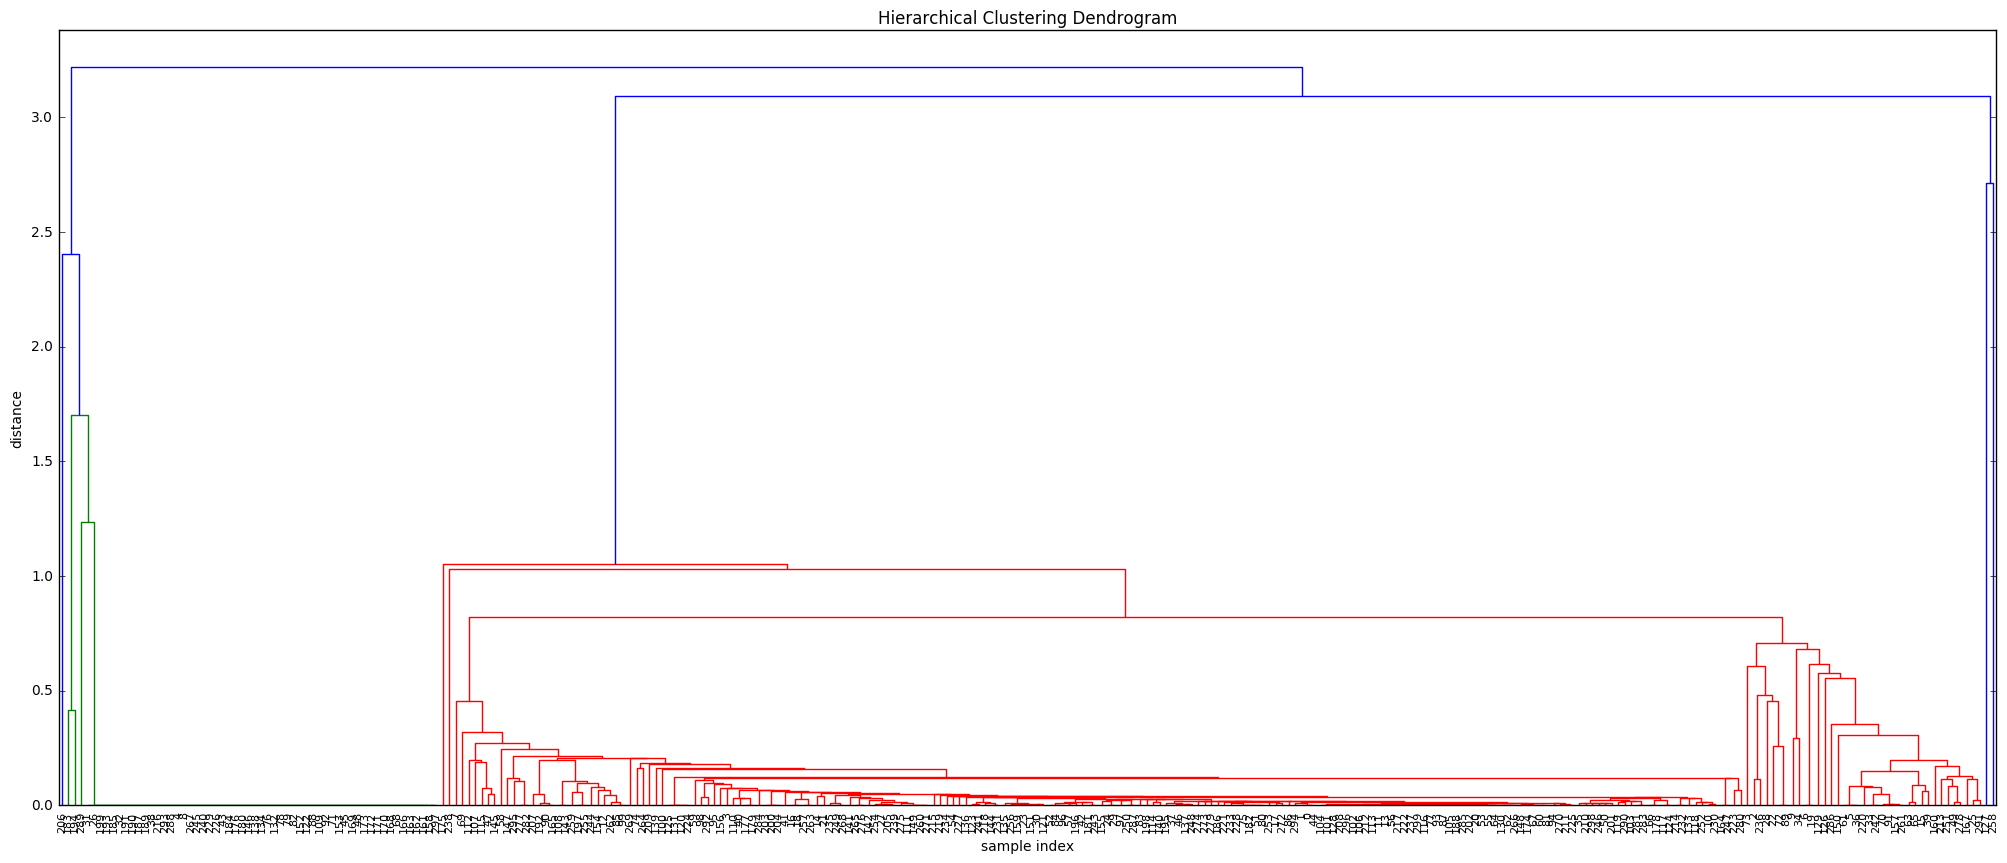

In [66]:
import scipy.cluster.hierarchy as hac
import math
# Here we decided to use spearman correlation
# correlation_matrix = df.iloc[0:3000,:].corr(method='spearman')

# Do the clustering
x = df.iloc[0:3000,0:300]
correlation_matrix = x.corr(method='spearman').as_matrix()
for index, y in np.ndenumerate(correlation_matrix):
    if math.isnan(y):
        correlation_matrix[index[0],index[1]] = 0
Z = hac.single(correlation_matrix)
print(Z)
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()




In [44]:
from sklearn.cluster import AffinityPropagation
from scipy.spatial.distance import pdist, squareform
import math
x = df.iloc[0:1000,:]
col_dict = {}
for i, col in enumerate(df.columns):
    col_dict[i] = col
# Correlation Method
# var_x = x.var(axis=0)
# for idx, value in enumerate(var_x):
#     if math.isnan(var_x[idx]):
#         try:
#             del x[col_dict[idx]]
#         except:
#             continue
# correlation_matrix = x.corr(method='spearman').as_matrix()
# for index, y in np.ndenumerate(correlation_matrix):
#     if math.isnan(y):
#         correlation_matrix[index[0],index[1]] = 0.0
# Manhattan Distance metric
distance_matrix = squareform(pdist(x, metric='Euclidean'))
af = AffinityPropagation(affinity='precomputed').fit(distance_matrix)


In [45]:
af.cluster_centers_indices_.size

2

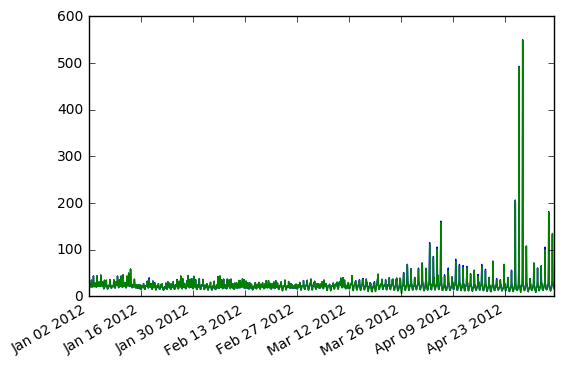

In [46]:
exemplar_names = []
for idx in af.cluster_centers_indices_:
    exemplar_names.append(col_dict[idx])
exemplars = df[exemplar_names].iloc[0:3000,:]
ax = exemplars.plot()
ax.legend_.remove()
plt.show()

In [47]:
print(exemplar_names)

['HN_138A', 'R_HLSES_2']
